In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [22]:
df=pd.read_csv("data/KDDTrain+.txt",header=None)
print("Dataset Shape",df.shape)
df.head()

Dataset Shape (125973, 43)


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [23]:
columns = [
"duration","protocol_type","service","flag","src_bytes","dst_bytes",
"land","wrong_fragment","urgent","hot","num_failed_logins",
"logged_in","num_compromised","root_shell","su_attempted",
"num_root","num_file_creations","num_shells","num_access_files",
"num_outbound_cmds","is_host_login","is_guest_login",
"count","srv_count","serror_rate","srv_serror_rate","rerror_rate",
"srv_rerror_rate","same_srv_rate","diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate","dst_host_diff_srv_rate",
"dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
"dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate",
"label","difficulty"
]

df.columns = columns

df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [25]:
le = LabelEncoder()

df["protocol_type"] = le.fit_transform(df["protocol_type"])
df["service"] = le.fit_transform(df["service"])
df["flag"] = le.fit_transform(df["flag"])

In [26]:
df["label"]=df["label"].apply(lambda x: 0 if x=="normal" else 1)
df["label"].value_counts()

label
0    67343
1    58630
Name: count, dtype: int64

In [27]:
df=df.drop("difficulty",axis=1)

In [28]:
x=df.drop("label",axis=1)
y=df["label"]

print("Feature shape:",x.shape)
print("Target shape:",y.shape)

Feature shape: (125973, 41)
Target shape: (125973,)


In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("Training set:",x_train.shape)
print("Testing set:",x_test.shape)

Training set: (100778, 41)
Testing set: (25195, 41)


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

lr=LogisticRegression(max_iter=2000)
lr.fit(x_train_scaled,y_train)

y_pred_lr=lr.predict(x_test_scaled)

print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

Logistic Regression Accuracy: 0.951855526890256
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     13422
           1       0.96      0.94      0.95     11773

    accuracy                           0.95     25195
   macro avg       0.95      0.95      0.95     25195
weighted avg       0.95      0.95      0.95     25195



In [33]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred_dt=dt.predict(x_test)

print("Decision Tree Accuracy:",accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_dt))

Decision Tree Accuracy: 0.951855526890256
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



In [34]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

y_pred_rf=rf.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Accuracy: 0.9986902163127604
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



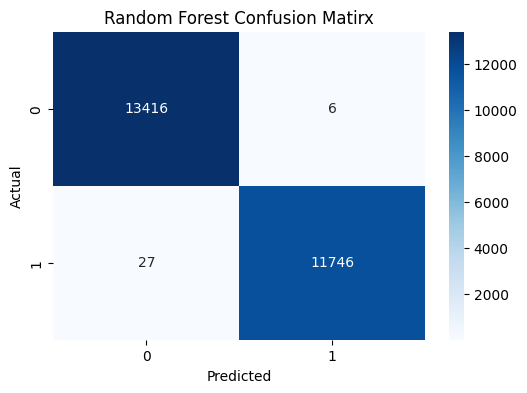

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matirx")
plt.show()

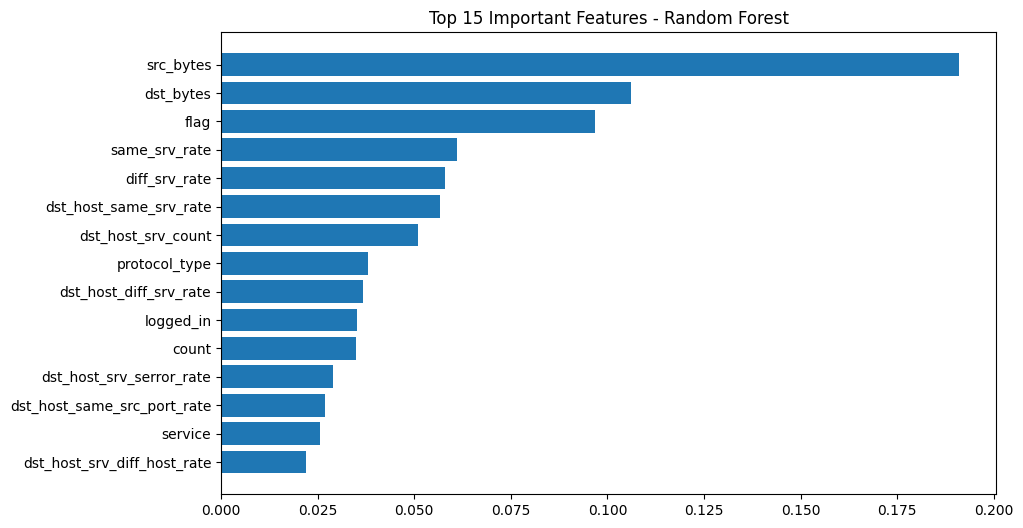

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

importances=rf.feature_importances_

feature_importance_df=pd.DataFrame({"Feature":x.columns,"Importance":importances})

feature_importance_df=feature_importance_df.sort_values(
    by="Importance",ascending=False
).head(15)

plt.figure(figsize=(10,6))
plt.barh(feature_importance_df["Feature"],feature_importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Important Features - Random Forest")
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 20, 30],
    "min_samples_split": [2, 5],
}

rf_model = RandomForestClassifier()

grid_search = GridSearchCV(
    rf_model,
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [38]:
df_test = pd.read_csv("data/KDDTest+.txt", header=None)
df_test.columns = columns

In [39]:
# Encode categorical
df_test["protocol_type"] = le.fit_transform(df_test["protocol_type"])
df_test["service"] = le.fit_transform(df_test["service"])
df_test["flag"] = le.fit_transform(df_test["flag"])

# Convert label
df_test["label"] = df_test["label"].apply(
    lambda x: 0 if x == "normal" else 1
)

df_test = df_test.drop("difficulty", axis=1)

X_real = df_test.drop("label", axis=1)
y_real = df_test["label"]

In [40]:
y_real_pred = best_rf.predict(X_real)

print("Real Test Accuracy:",
      accuracy_score(y_real, y_real_pred))

Real Test Accuracy: 0.7640170333569908
